In [7]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e42189a50476cbf5de8b04c40c7c7d0d9aad59e285c1fd46821ed69567de4cc1
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("/content/markrting campain.xlsx")



A1.

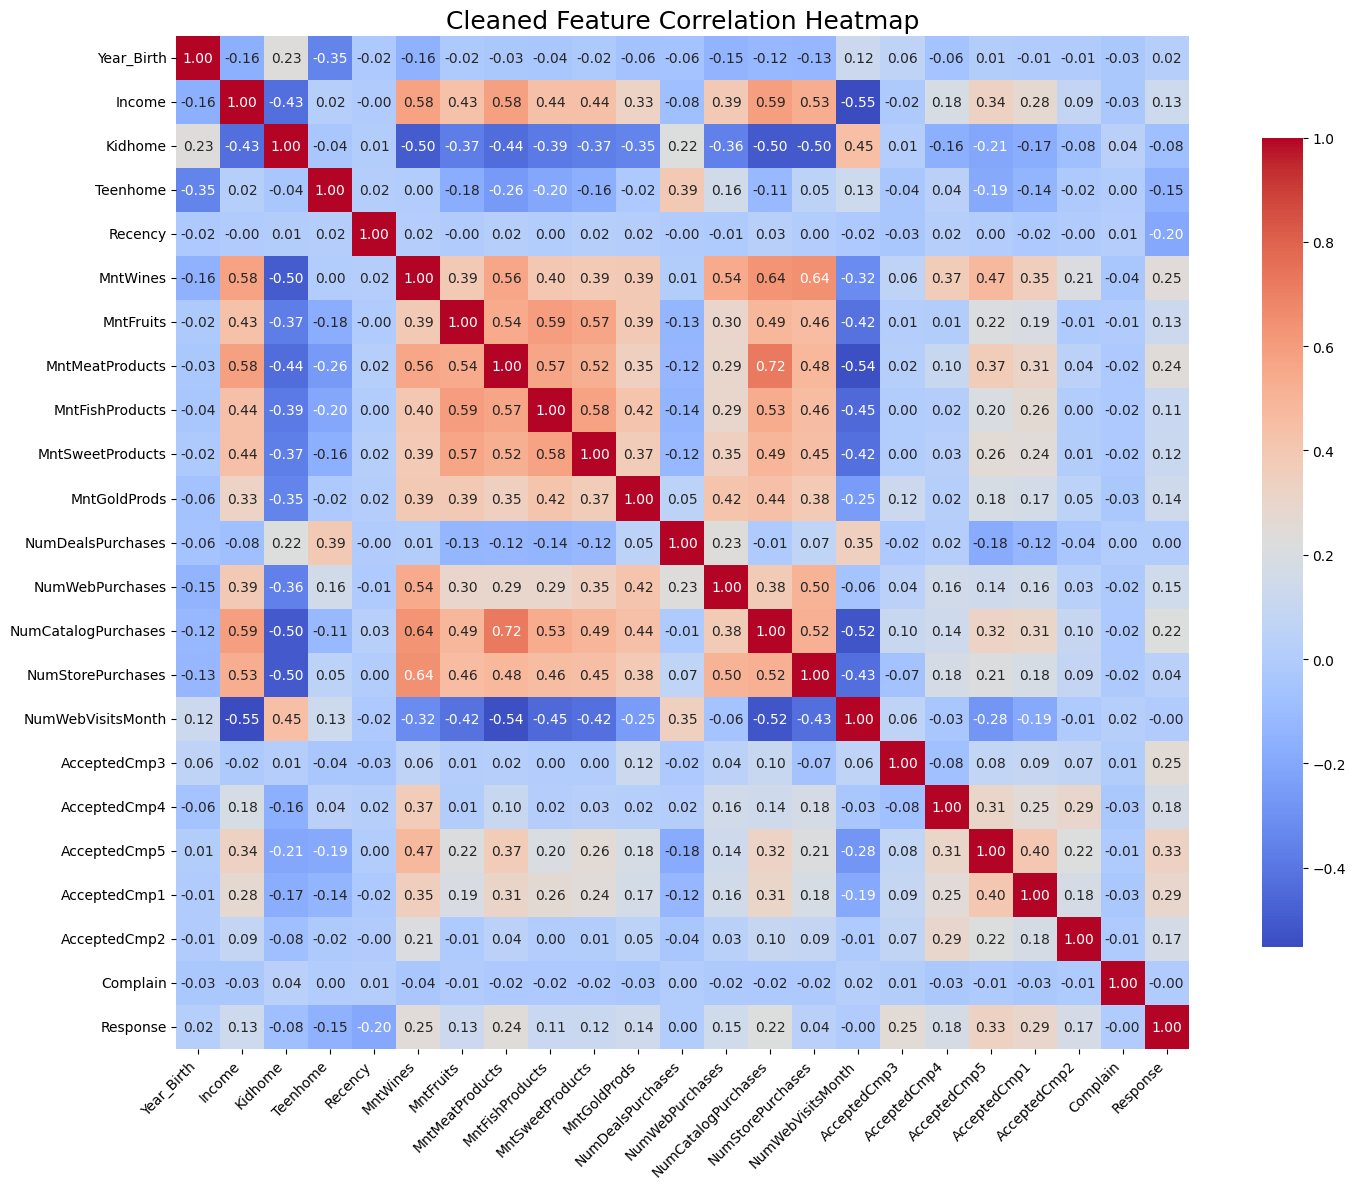

In [3]:
# Convert 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# ID is just a unique identifier, and Z_CostContact and Z_Revenue are constants
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the heatmap plot
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Cleaned Feature Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


A2.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df.drop(columns=["ID", "Z_CostContact", "Z_Revenue"], inplace=True)

# Convert date to datetime and fill missing income
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
df['Income'].fillna(df['Income'].median(), inplace=True)

# Drop non-numeric or non-useful columns
X = df.drop(columns=["Response", "Dt_Customer", "Education", "Marital_Status"])
y = df["Response"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA: Retain 99% of variance
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_scaled)

print(f"Original feature count: {X.shape[1]}")
print(f"Reduced feature count (PCA): {X_pca.shape[1]}")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.2, random_state=42)

# Models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate on original and PCA features
for name, model in models.items():
    # Original features
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} (Original Features):")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # PCA features
    model.fit(X_pca_train, y_train)
    y_pred_pca = model.predict(X_pca_test)
    print(f"\n{name} (PCA Features):")
    print("Accuracy:", accuracy_score(y_test, y_pred_pca))
    print(classification_report(y_test, y_pred_pca))


<ipython-input-4-ad4aedd6c97c>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


Original feature count: 22
Reduced feature count (PCA): 21

Logistic Regression (Original Features):
Accuracy: 0.8616071428571429
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       379
           1       0.63      0.25      0.35        69

    accuracy                           0.86       448
   macro avg       0.75      0.61      0.64       448
weighted avg       0.84      0.86      0.83       448


Logistic Regression (PCA Features):
Accuracy: 0.8638392857142857
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       379
           1       0.64      0.26      0.37        69

    accuracy                           0.86       448
   macro avg       0.76      0.62      0.65       448
weighted avg       0.84      0.86      0.84       448


Random Forest (Original Features):
Accuracy: 0.8660714285714286
              precision    recall  f1-score   support

           0       0.88      0

A3.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load and prepare the dataset
df = pd.read_excel("markrting campain.xlsx")
df.drop(columns=["ID", "Z_CostContact", "Z_Revenue"], inplace=True)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
df['Income'].fillna(df['Income'].median(), inplace=True)

# Drop non-numeric or non-useful columns
X = df.drop(columns=["Response", "Dt_Customer", "Education", "Marital_Status"])
y = df["Response"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA: Retain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original feature count: {X.shape[1]}")
print(f"Reduced feature count (PCA 95%): {X_pca.shape[1]}")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.2, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

# Evaluate models with and without PCA
for name, model in models.items():
    # Original data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} (Original Features):")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # PCA-transformed data
    model.fit(X_pca_train, y_train)
    y_pred_pca = model.predict(X_pca_test)
    print(f"\n{name} (PCA 95% Features):")
    print("Accuracy:", accuracy_score(y_test, y_pred_pca))
    print(classification_report(y_test, y_pred_pca))


<ipython-input-5-de0bef64897b>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


Original feature count: 22
Reduced feature count (PCA 95%): 18

Logistic Regression (Original Features):
Accuracy: 0.8616071428571429
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       379
           1       0.63      0.25      0.35        69

    accuracy                           0.86       448
   macro avg       0.75      0.61      0.64       448
weighted avg       0.84      0.86      0.83       448


Logistic Regression (PCA 95% Features):
Accuracy: 0.8616071428571429
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       379
           1       0.63      0.25      0.35        69

    accuracy                           0.86       448
   macro avg       0.75      0.61      0.64       448
weighted avg       0.84      0.86      0.83       448


Random Forest (Original Features):
Accuracy: 0.8660714285714286
              precision    recall  f1-score   support

           0       0.8

A4.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess the dataset
df = pd.read_excel("markrting campain.xlsx")
df.drop(columns=["ID", "Z_CostContact", "Z_Revenue"], inplace=True)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
df['Income'].fillna(df['Income'].median(), inplace=True)

# Define X and y
X = df.drop(columns=["Response", "Dt_Customer", "Education", "Marital_Status"])
y = df["Response"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

# Perform Sequential Feature Selection and evaluate
for name, model in models.items():
    sfs = SequentialFeatureSelector(model, n_features_to_select="auto", direction="forward", cv=5, scoring='accuracy')
    sfs.fit(X_train, y_train)

    # Transform both train and test
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Retrain and evaluate
    model.fit(X_train_sfs, y_train)
    y_pred_sfs = model.predict(X_test_sfs)

    print(f"\n{name} (Sequential Feature Selection):")
    print(f"Selected Features: {sfs.get_support(indices=True)}")
    print("Accuracy:", accuracy_score(y_test, y_pred_sfs))
    print(classification_report(y_test, y_pred_sfs))


<ipython-input-6-ddb8234fe23a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)



Logistic Regression (Sequential Feature Selection):
Selected Features: [ 0  1  2  4 14 15 16 18 19 20 21]
Accuracy: 0.8549107142857143
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       379
           1       0.58      0.22      0.32        69

    accuracy                           0.85       448
   macro avg       0.72      0.59      0.62       448
weighted avg       0.83      0.85      0.83       448


Random Forest (Sequential Feature Selection):
Selected Features: [ 1  2  4 11 13 15 16 18 19 20 21]
Accuracy: 0.8660714285714286
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       379
           1       0.61      0.36      0.45        69

    accuracy                           0.87       448
   macro avg       0.75      0.66      0.69       448
weighted avg       0.85      0.87      0.85       448



In [10]:
def train_model(X, y):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    return model, X_train, X_test, y_train, y_test

def explain_with_lime(model, X_train, X_test, feature_names, instance_index=0):
    import lime
    import lime.lime_tabular

    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train,
        feature_names=feature_names,
        class_names=["Not Responded", "Responded"],
        mode="classification"
    )

    exp = explainer.explain_instance(X_test[instance_index], model.predict_proba, num_features=10)
    exp.show_in_notebook(show_table=True)
    return exp

def explain_with_shap(model, X_test, feature_names, instance_index=0):
    import shap
    import pandas as pd

    shap.initjs()

    # Convert to DataFrame to retain feature names
    X_test_df = pd.DataFrame(X_test, columns=feature_names)

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_df)

    # Global summary plot
    shap.summary_plot(shap_values[1], X_test_df, feature_names=feature_names)

    # Local force plot for one instance
    shap.force_plot(
        explainer.expected_value[1],
        shap_values[1][instance_index],
        X_test_df.iloc[instance_index],
        feature_names=feature_names
    )

def evaluate_model(model, X_test, y_test):
    from sklearn.metrics import accuracy_score, classification_report

    y_pred = model.predict(X_test)
    print("Model Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

feature_names = X.columns
model, X_train, X_test, y_train, y_test = train_model(X_scaled, y)
evaluate_model(model, X_test, y_test)
explain_with_lime(model, X_train, X_test, feature_names, instance_index=0)


Model Accuracy: 0.8638392857142857
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       379
           1       0.64      0.26      0.37        69

    accuracy                           0.86       448
   macro avg       0.76      0.62      0.65       448
weighted avg       0.84      0.86      0.84       448

